# SETUP

In [1]:
import sys
import os

import numpy as np
import sounddevice as sd
import scipy.signal as signal
import librosa

sys.path.append("/Users/carlosedm10/projects/college/TDS")
from matplotlib import pyplot as plt

from utils import (
    number_count_detector,
    export_numbers,
    m4a_to_wav,
)

people = ("Carlos", "María", "Mamá")
numbers = (
    "cero",
    "uno",
    "dos",
    "tres",
    "cuatro",
    "cinco",
    "seis",
    "siete",
    "ocho",
    "nueve",
)


def _rename_final_audios():
    for j, person in enumerate(people):
        for audio in range(1, 5):
            for i in range(0, 10):
                print(
                    f"Renaming {person}_{audio}_{i}.wav to {numbers[i]}_{j}_{audio}.wav"
                )
                os.rename(
                    f"/Users/carlosedm10/projects/college/TDS/Audio Prep/Final Audios/{person}_{audio}_{i}.wav",
                    f"/Users/carlosedm10/projects/college/TDS/Audio Prep/Final Audios/{numbers[i]}_{j}_{audio}.wav",
                )

# AUDIO PROCESSING

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: Carlos Audio: 1 Freq: 16000Hz
Thresholds used: [1]
Threshold used: 0.01
Number of numbers detected: 13
Maximum amplitude: 0.8498981743218798
[0 0 0 ... 0 0 0]


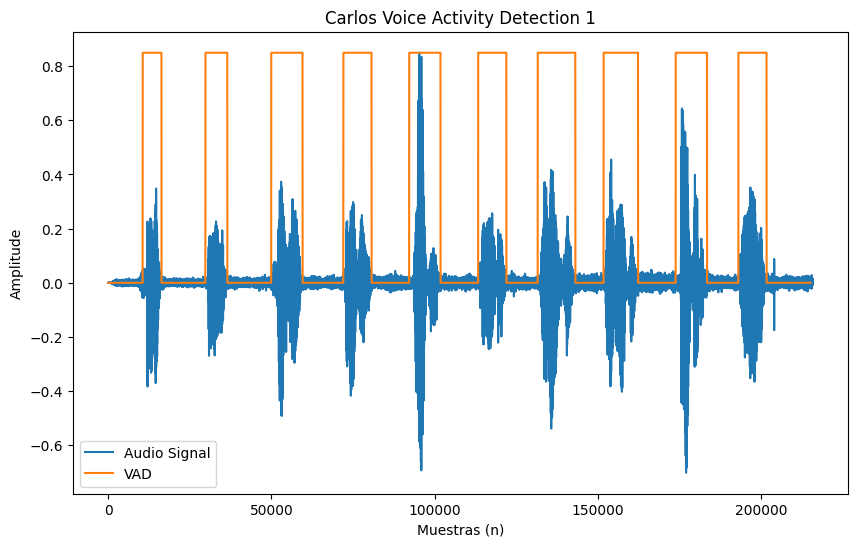

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: Carlos Audio: 2 Freq: 16000Hz
Thresholds used: [1, 2, 3, 4, 5, 6]
Threshold used: 0.035
Number of numbers detected: 10
Maximum amplitude: 0.30226033258531526
[0 0 0 ... 0 0 0]


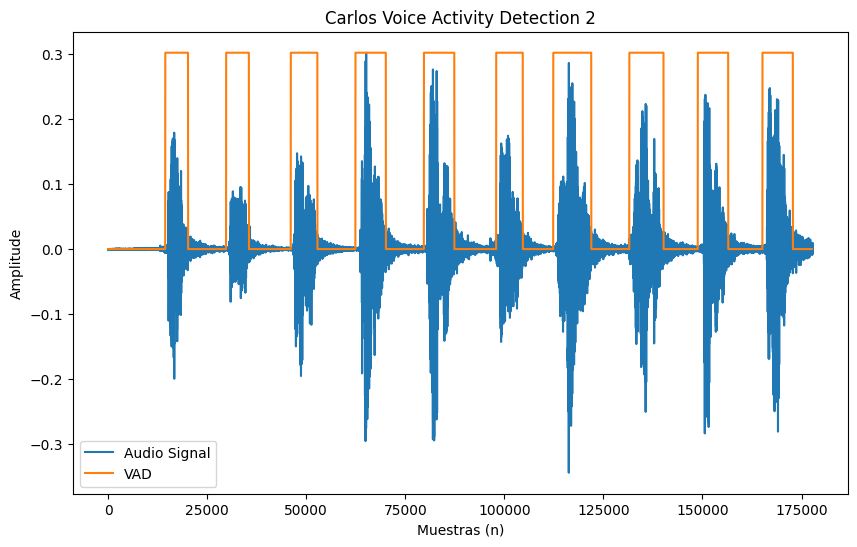

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: Carlos Audio: 3 Freq: 16000Hz
Thresholds used: [1]
Threshold used: 0.01
Number of numbers detected: 15
Maximum amplitude: 0.8718688724202243
[0 0 0 ... 0 0 0]


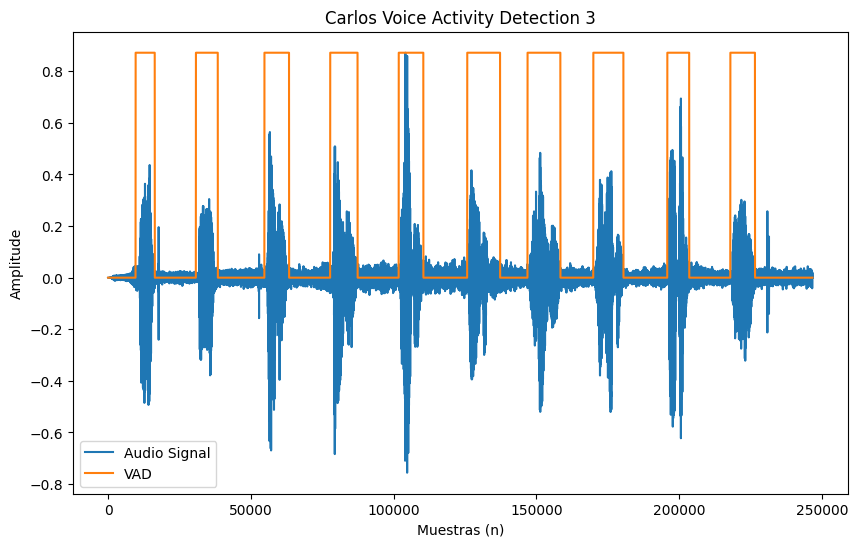

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: Carlos Audio: 4 Freq: 16000Hz
Thresholds used: [1]
Threshold used: 0.01
Number of numbers detected: 13
Maximum amplitude: 0.7238415830558381
[0 0 0 ... 0 0 0]


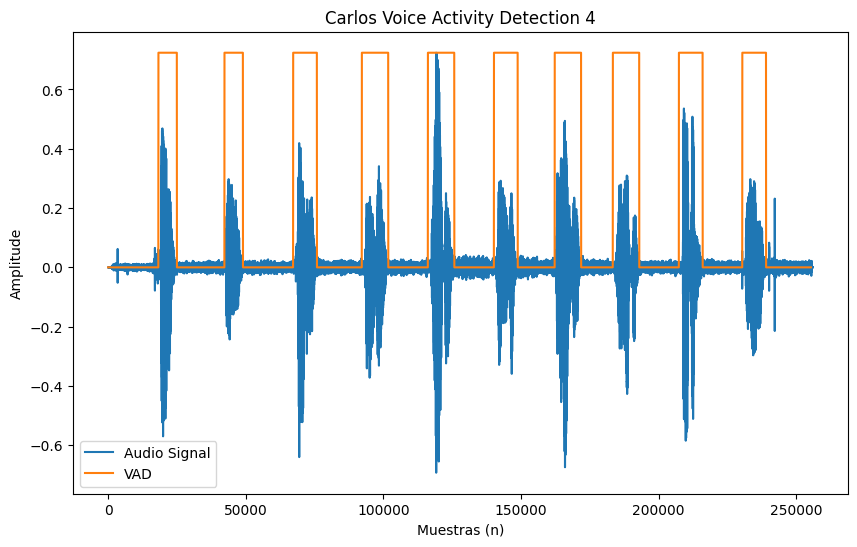

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: María Audio: 1 Freq: 16000Hz
Thresholds used: [2]
Threshold used: 0.02
Number of numbers detected: 14
Maximum amplitude: 0.39110500186200226
[0 0 0 ... 0 0 0]


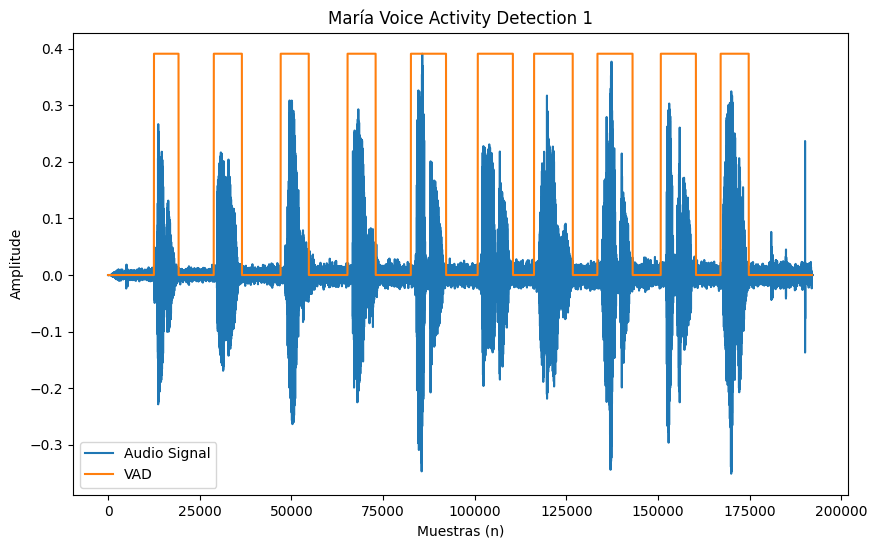

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: María Audio: 2 Freq: 16000Hz
Thresholds used: [3]
Threshold used: 0.03
Number of numbers detected: 15
Maximum amplitude: 0.36327372828475313
[0 0 0 ... 0 0 0]


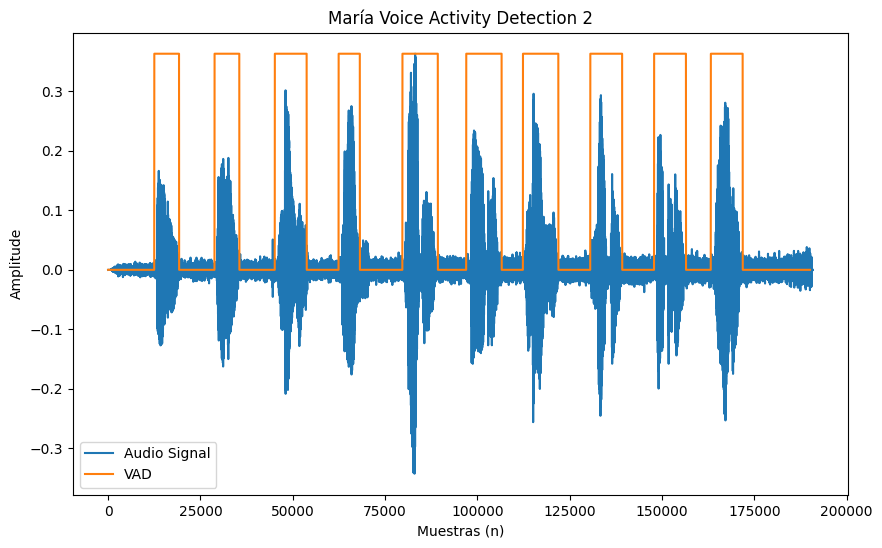

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: María Audio: 3 Freq: 16000Hz
Thresholds used: [5]
Threshold used: 0.05
Number of numbers detected: 18
Maximum amplitude: 0.3297147800808389
[0 0 0 ... 0 0 0]


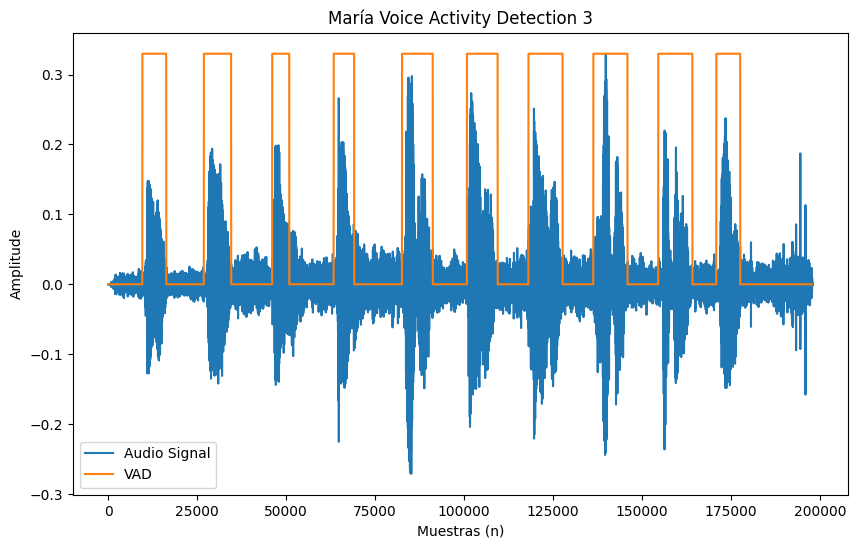

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: María Audio: 4 Freq: 16000Hz
Thresholds used: [2]
Threshold used: 0.02
Number of numbers detected: 13
Maximum amplitude: 0.2795262727606655
[0 0 0 ... 0 0 0]


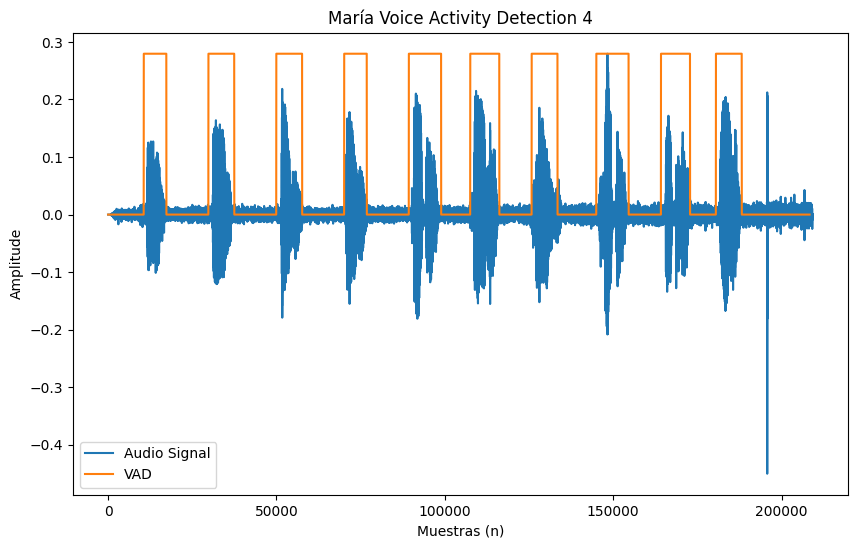

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: Mamá Audio: 1 Freq: 16000Hz
Thresholds used: [1]
Threshold used: 0.01
Number of numbers detected: 14
Maximum amplitude: 0.5572877413889484
[0 0 0 ... 0 0 0]


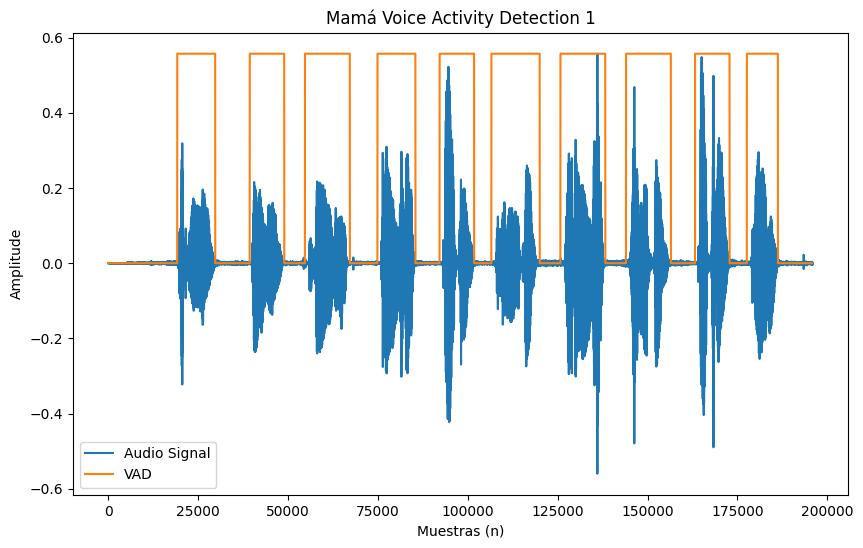

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: Mamá Audio: 2 Freq: 16000Hz
Thresholds used: [1]
Threshold used: 0.01
Number of numbers detected: 15
Maximum amplitude: 0.8887344369625272
[0 0 0 ... 0 0 0]


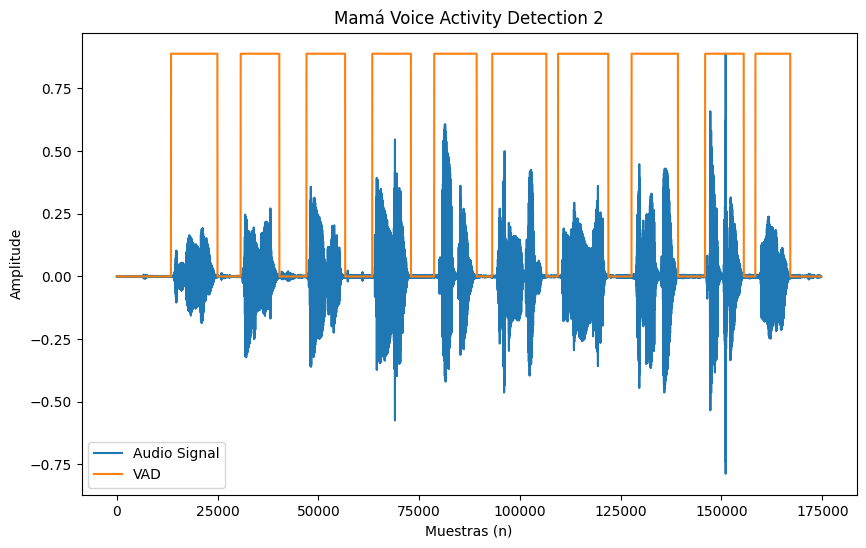

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: Mamá Audio: 3 Freq: 16000Hz
Thresholds used: [1]
Threshold used: 0.01
Number of numbers detected: 14
Maximum amplitude: 0.766162119603726
[0 0 0 ... 0 0 0]


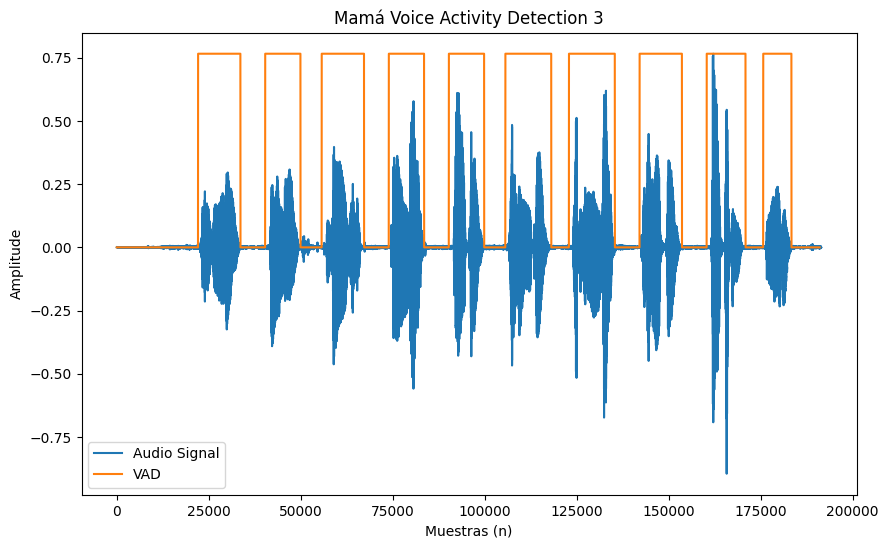

Audio frequency: 48000Hz
Resampling audio from 48000Hz to 16000Hz
Person: Mamá Audio: 4 Freq: 16000Hz
Thresholds used: [1]
Threshold used: 0.01
Number of numbers detected: 16
Maximum amplitude: 0.8473090224767887
[0 0 0 ... 0 0 0]


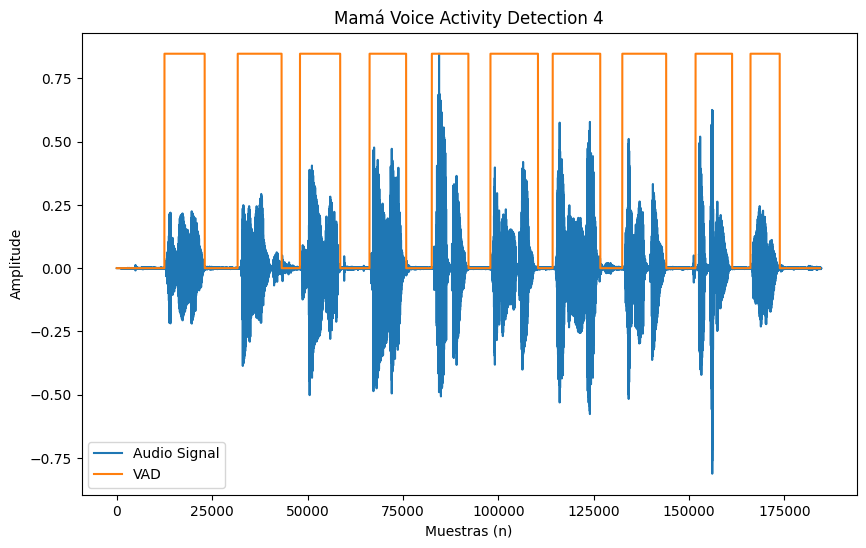

Renaming Carlos_1_0.wav to cero_0_1.wav
Renaming Carlos_1_1.wav to uno_0_1.wav
Renaming Carlos_1_2.wav to dos_0_1.wav
Renaming Carlos_1_3.wav to tres_0_1.wav
Renaming Carlos_1_4.wav to cuatro_0_1.wav
Renaming Carlos_1_5.wav to cinco_0_1.wav
Renaming Carlos_1_6.wav to seis_0_1.wav
Renaming Carlos_1_7.wav to siete_0_1.wav
Renaming Carlos_1_8.wav to ocho_0_1.wav
Renaming Carlos_1_9.wav to nueve_0_1.wav
Renaming Carlos_2_0.wav to cero_0_2.wav
Renaming Carlos_2_1.wav to uno_0_2.wav
Renaming Carlos_2_2.wav to dos_0_2.wav
Renaming Carlos_2_3.wav to tres_0_2.wav
Renaming Carlos_2_4.wav to cuatro_0_2.wav
Renaming Carlos_2_5.wav to cinco_0_2.wav
Renaming Carlos_2_6.wav to seis_0_2.wav
Renaming Carlos_2_7.wav to siete_0_2.wav
Renaming Carlos_2_8.wav to ocho_0_2.wav
Renaming Carlos_2_9.wav to nueve_0_2.wav
Renaming Carlos_3_0.wav to cero_0_3.wav
Renaming Carlos_3_1.wav to uno_0_3.wav
Renaming Carlos_3_2.wav to dos_0_3.wav
Renaming Carlos_3_3.wav to tres_0_3.wav
Renaming Carlos_3_4.wav to cuatro_0_

In [2]:
for person in people:
    for audio in range(1, 5):
        m4a_path = f"/Users/carlosedm10/projects/college/TDS/Audio Prep/Original Audios/{person} {audio}.m4a"
        wav_path = f"/Users/carlosedm10/projects/college/TDS/Audio Prep/Original Audios/{person} {audio}.wav"
        audio_data, freq, target_freq = m4a_to_wav(m4a_path, wav_path)

        print(f"Person: {person} Audio: {audio} Freq: {target_freq}Hz")

        window_size = 0.02  # 32ms
        window_overlap = 0  # No overlap

        voice = number_count_detector(
            audio_data,
            freq,
            window_size,
            window_overlap,
            count=10,
        )
        print(voice)
        # Plot the VAD
        plt.figure(figsize=(10, 6))
        plt.plot(audio_data, label="Audio Signal")
        plt.plot(voice * np.max(audio_data), label="VAD")
        plt.xlabel("Muestras (n)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.title(f"{person} Voice Activity Detection {audio}")
        plt.show()

        # Export the audios:
        export_numbers(
            audio_data,
            target_freq,
            voice,
            10,
            f"/Users/carlosedm10/projects/college/TDS/Audio Prep/Final Audios/{person}_{audio}_",
        )
_rename_final_audios()